In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import interp1d, BarycentricInterpolator
from sympy import symbols, Eq, solve

# Problem 1B

In [21]:
Xt = 0.11
At = 14.2515
Bt = 3242.38
Ct = -67.1806

Xd = 0.89
Ad = 14.4481
Bd = 4415.36
Cd = -79.1919

P_total = 101

def bubble_point_eqn(T):
    P_t = np.exp(At - (Bt / (T + Ct)))
    P_d = np.exp(Ad - (Bd / (T + Cd)))
    return Xt * P_t + Xd * P_d - P_total

T0 = 322

T_bubble = fsolve(bubble_point_eqn, T0)[0]
print(round(T_bubble, 1), "K")



483.6 K


# Problem 2B

In [22]:
P = symbols('P')
equation = Eq(70, (40 * 1844 / P) + 60 - (30 / ((40 * 23450 / P) + 60)) * ((40 * 1844 / P) + 60))

solution = solve(equation, P)
print("P =",[solve for solve in solution if solve > 0])
P = [solve for solve in solution if solve > 0][0]

rewritten_solve = -8959.0/6.0 + np.sqrt(1118066881.0)/6.0
print("P =", np.round(rewritten_solve, 2), "mmHg")

P = [-8959/6 + sqrt(1118066881)/6]
P = 4079.75 mmHg


# Problem 3A

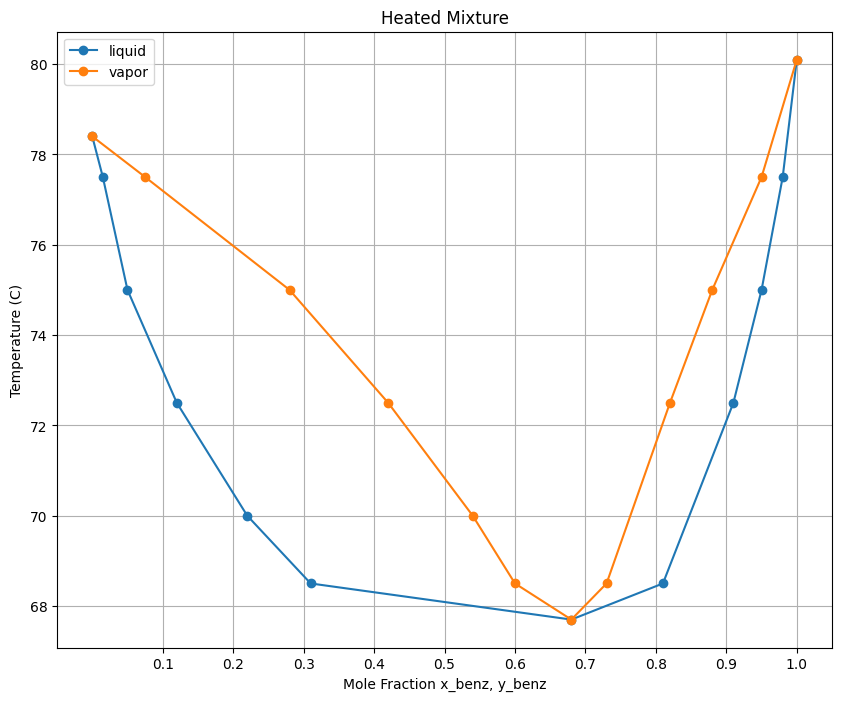

In [4]:
T = [78.4, 77.5, 75.0, 72.5, 70, 68.5, 67.7, 68.5, 72.5, 75.0, 77.5, 80.1]
y = [0, 0.075, 0.28, 0.42, 0.54, 0.60, 0.68, 0.73, 0.82, 0.88, 0.95, 1.0]
x = [0, 0.015, 0.05, 0.12, 0.22, 0.31, 0.68, 0.81, 0.91, 0.95, 0.98, 1.0]

plt.figure(figsize=(10, 8))
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.plot(x, T, marker='o', markersize=6, label = "liquid")
plt.plot(y, T, marker = "o", markersize=6, label = "vapor")
plt.legend()
plt.xlabel("Mole Fraction x_benz, y_benz")
plt.ylabel("Temperature (C)")
plt.title("Heated Mixture")
plt.grid()



In [5]:
interp_linear = interp1d(x, T, kind='linear')
interp_quad = interp1d(x, T, kind="quadratic")
x_feed = 0.3
print("Temperature at bubble point is", interp_linear(x_feed), "degrees C, via linear interpolation")
print("Temperature at bubble point is", interp_quad(x_feed), "degrees C, via quadratic interpolation")

Temperature at bubble point is 68.66666666666667 degrees C, via linear interpolation
Temperature at bubble point is 68.6324815268648 degrees C, via quadratic interpolation


# Problem 3B

In [6]:
T_before = [78.4, 77.5, 75.0, 72.5, 70, 68.5]
y_before = [0, 0.075, 0.28, 0.42, 0.54, 0.60]
T_after = [68.5, 72.5, 75.0, 77.5, 80.1]
y_after = [0.73, 0.82, 0.88, 0.95, 1.0]

interp_y_before = interp1d(T_before, y_before, kind='linear')
interp_y_after = interp1d(T_after, y_after, kind='linear')
y_at_T_6867_before = interp_y_before(68.67)
y_at_T_6867_after = interp_y_after(68.67)

y_values_at_T_6867 = [y_at_T_6867_before.item(), y_at_T_6867_after.item()]

print(f"The interpolated values of y at T = {68.67} are: {y_values_at_T_6867}")

# we want the first bubble, which will be at the first mole fraction

The interpolated values of y at T = 68.67 are: [0.5932, 0.7338250000000001]


# Problem 3C

The x_resid value after 25% vaporization is 0.21357142857142838


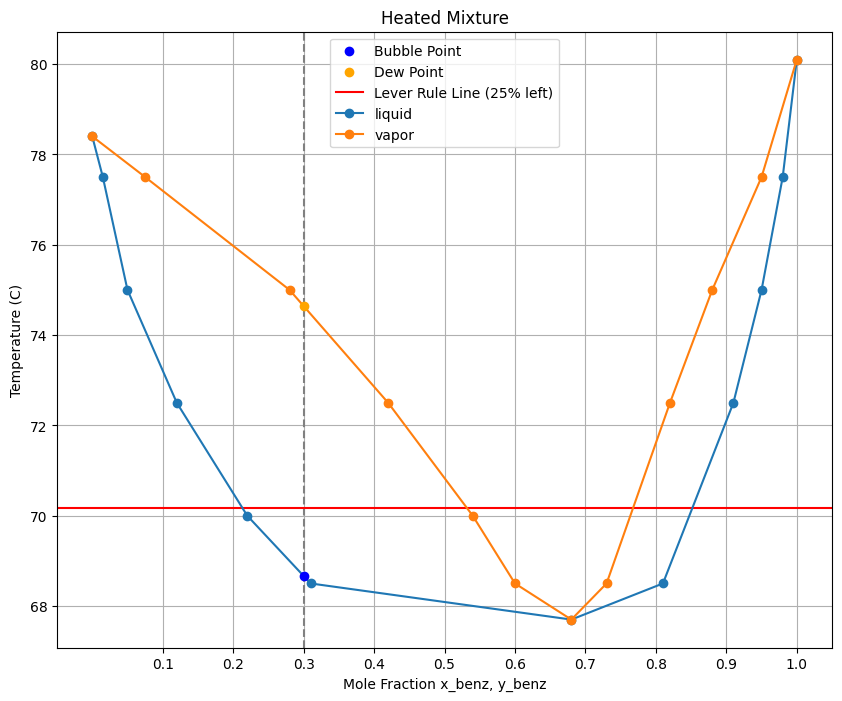

In [7]:
plt.figure(figsize=(10, 8))
plt.axvline(x=0.3, color='grey', linestyle='--')

T_liquid_at_x_target = np.interp(0.3, x, T)
T_vapor_at_x_target = np.interp(0.3, y, T)
AB_length = T_vapor_at_x_target - T_liquid_at_x_target
T_B = T_liquid_at_x_target + 0.25 * AB_length

plt.scatter([0.3], [T_liquid_at_x_target], color='blue', zorder=5, label="Bubble Point")
plt.scatter([0.3], [T_vapor_at_x_target], color='orange', zorder=5, label="Dew Point")
plt.axhline(y=T_B, color='red', label='Lever Rule Line (25% left)')

# interpolate to find x_resid where lever rule intersects with liquid phase curve
f = interp1d(x, T, kind='linear')

def find_intersection(f, T_B, x_range):
    x_values = np.linspace(x_range[0], x_range[1], 1000)
    y_values = f(x_values) - T_B
    sign_changes = np.where(np.diff(np.sign(y_values)))[0]
    
    intersections = []
    for idx in sign_changes:
        x_intersect = x_values[idx] + (x_values[idx + 1] - x_values[idx]) * (-y_values[idx]) / (y_values[idx + 1] - y_values[idx])
        intersections.append(x_intersect)
    
    return intersections

x_range = (x[0], x[-1])

intersections = find_intersection(f, T_B, x_range)
print("The x_resid value after 25% vaporization is {}".format(min(intersections)))

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.plot(x, T, marker='o', markersize=6, label = "liquid")
plt.plot(y, T, marker = "o", markersize=6, label = "vapor")
plt.legend()
plt.xlabel("Mole Fraction x_benz, y_benz")
plt.ylabel("Temperature (C)")
plt.title("Heated Mixture")
plt.grid()

# Problem 3D

The x_resid value after 90% vaporization is 0.07673333333333347


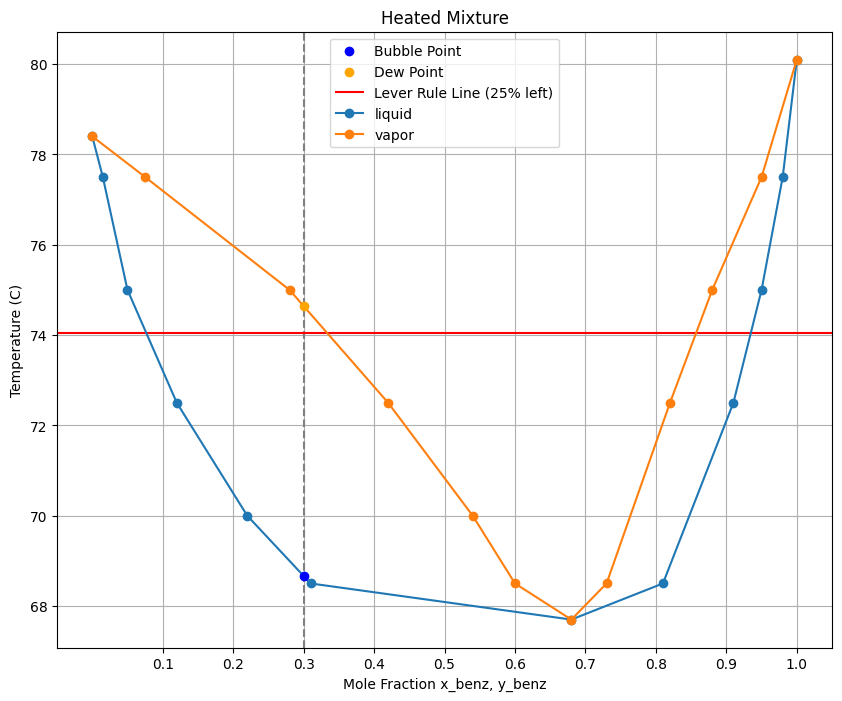

In [8]:
plt.figure(figsize=(10, 8))
plt.axvline(x=0.3, color='grey', linestyle='--')

T_liquid_at_x_target = np.interp(0.3, x, T)
T_vapor_at_x_target = np.interp(0.3, y, T)
AB_length = T_vapor_at_x_target - T_liquid_at_x_target
T_B = T_liquid_at_x_target + 0.9 * AB_length

plt.scatter([0.3], [T_liquid_at_x_target], color='blue', zorder=5, label="Bubble Point")
plt.scatter([0.3], [T_vapor_at_x_target], color='orange', zorder=5, label="Dew Point")
plt.axhline(y=T_B, color='red', label='Lever Rule Line (25% left)')

# interpolate to find x_resid where lever rule intersects with liquid phase curve
f = interp1d(x, T, kind='linear')

def find_intersection(f, T_B, x_range):
    x_values = np.linspace(x_range[0], x_range[1], 1000)
    y_values = f(x_values) - T_B
    sign_changes = np.where(np.diff(np.sign(y_values)))[0]
    
    intersections = []
    for idx in sign_changes:
        x_intersect = x_values[idx] + (x_values[idx + 1] - x_values[idx]) * (-y_values[idx]) / (y_values[idx + 1] - y_values[idx])
        intersections.append(x_intersect)
    
    return intersections

x_range = (x[0], x[-1])

intersections = find_intersection(f, T_B, x_range)
print("The x_resid value after 90% vaporization is {}".format(min(intersections)))

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.plot(x, T, marker='o', markersize=6, label = "liquid")
plt.plot(y, T, marker = "o", markersize=6, label = "vapor")
plt.legend()
plt.xlabel("Mole Fraction x_benz, y_benz")
plt.ylabel("Temperature (C)")
plt.title("Heated Mixture")
plt.grid()

# Problem 3E

The x_resid value after .35 vaporization of .25 removed feed is 0.04654191056910572


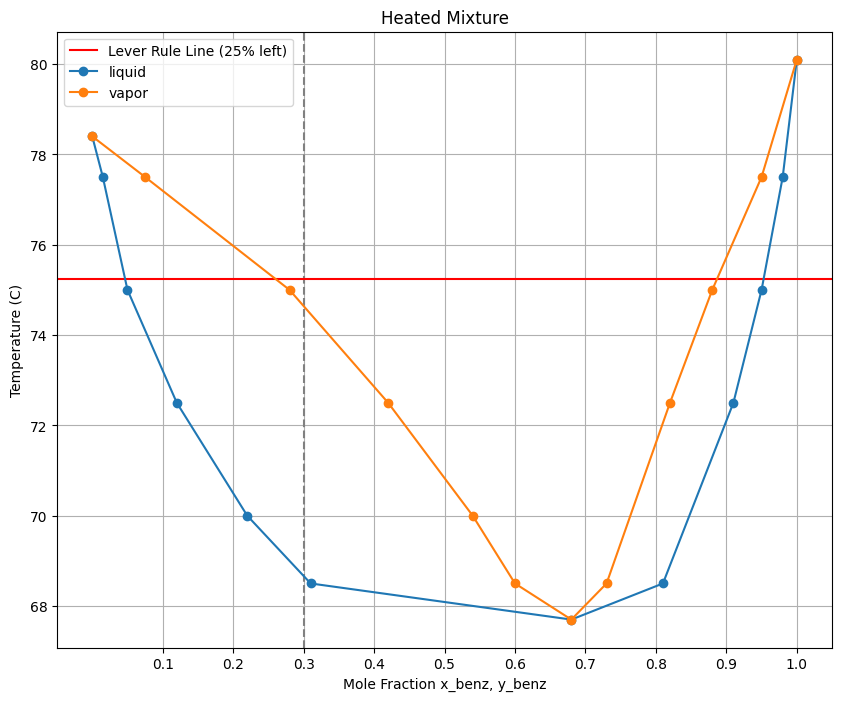

In [9]:
plt.figure(figsize=(10, 8))
plt.axvline(x=0.3, color='grey', linestyle='--')

x_resid_twenty_five = min(intersections) # from (c) we have this as .214

T_liquid_at_x_target = np.interp(x_resid_twenty_five, x, T)
T_vapor_at_x_target = np.interp(x_resid_twenty_five, y, T)
AB_length = T_vapor_at_x_target - T_liquid_at_x_target
T_B = T_liquid_at_x_target + 0.35 * AB_length

plt.axhline(y=T_B, color='red', label='Lever Rule Line (25% left)')

# interpolate to find x_resid where lever rule intersects with liquid phase curve
f = interp1d(x, T, kind='linear')

def find_intersection(f, T_B, x_range):
    x_values = np.linspace(x_range[0], x_range[1], 1000)
    y_values = f(x_values) - T_B
    sign_changes = np.where(np.diff(np.sign(y_values)))[0]
    
    intersections = []
    for idx in sign_changes:
        x_intersect = x_values[idx] + (x_values[idx + 1] - x_values[idx]) * (-y_values[idx]) / (y_values[idx + 1] - y_values[idx])
        intersections.append(x_intersect)
    
    return intersections

x_range = (x[0], x[-1])

intersections = find_intersection(f, T_B, x_range)
print("The x_resid value after .35 vaporization of .25 removed feed is {}".format(min(intersections)))

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.plot(x, T, marker='o', markersize=6, label = "liquid")
plt.plot(y, T, marker = "o", markersize=6, label = "vapor")
plt.legend()
plt.xlabel("Mole Fraction x_benz, y_benz")
plt.ylabel("Temperature (C)")
plt.title("Heated Mixture")
plt.grid()

# Problem 3F

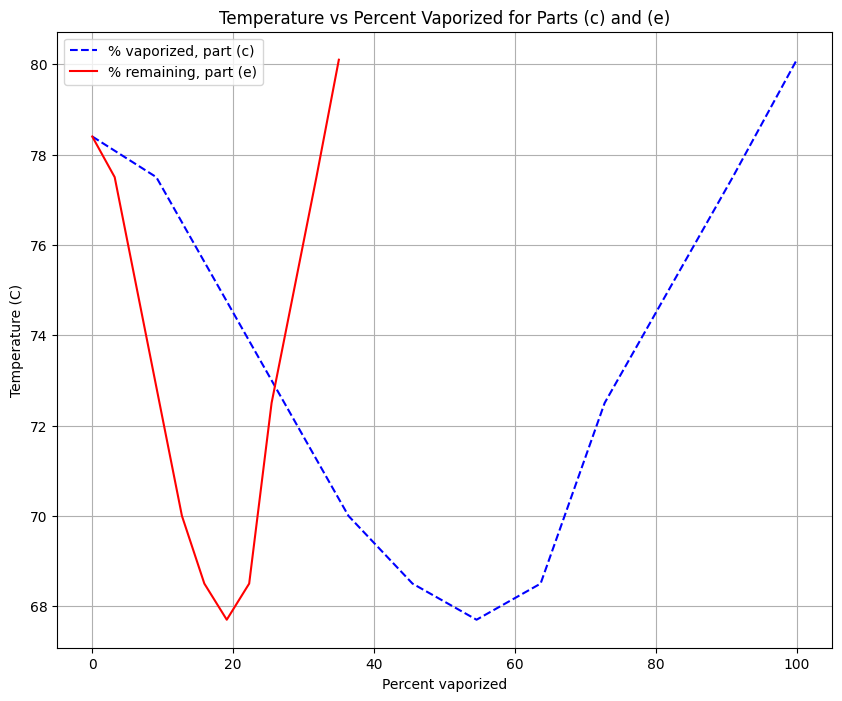

In [34]:
import numpy as np
import matplotlib.pyplot as plt

T = np.array([78.4, 77.5, 75.0, 72.5, 70, 68.5, 67.7, 68.5, 72.5, 75.0, 77.5, 80.1])

vapFraction_c = np.linspace(0, 100, len(T))
vapFraction_e = np.linspace(0, 100 * 0.35, len(T))

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(vapFraction_c,T, 'b--', label='% vaporized, part (c)')
plt.plot(vapFraction_e, T,'r-', label='% remaining, part (e)')

plt.ylabel('Temperature (C)')
plt.xlabel('Percent vaporized')
plt.title('Temperature vs Percent Vaporized for Parts (c) and (e)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Problem 3G

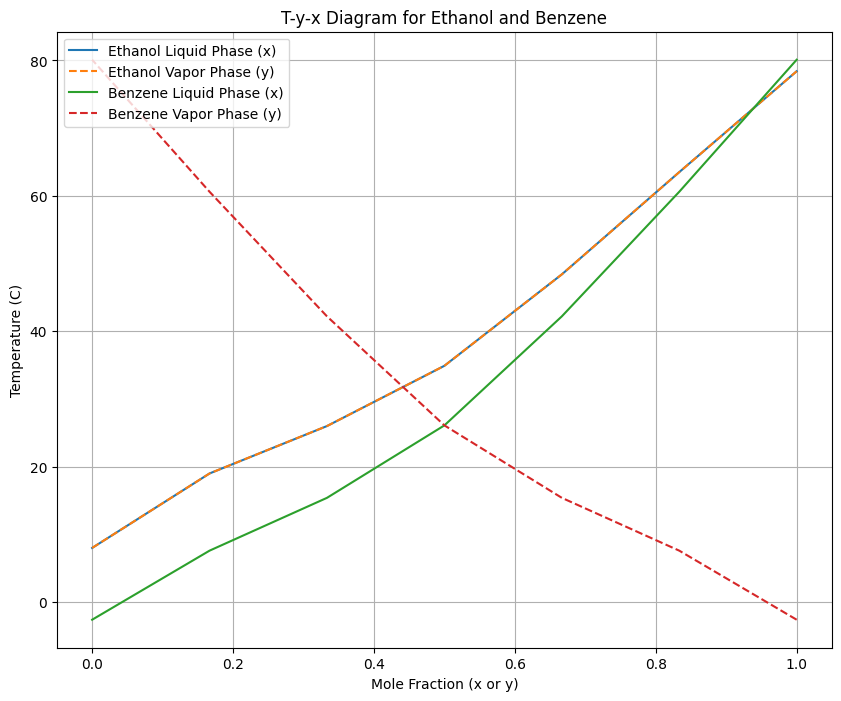

In [31]:

vapor_pressure = np.array([20, 40, 60, 100, 200, 400, 760])
T_ethanol = np.array([8, 19.0, 26.0, 34.9, 48.4, 63.5, 78.4])
T_benzene = np.array([-2.6, 7.6, 15.4, 26.1, 42.2, 60.6, 80.1])

P_total = 760

x_ethanol = np.linspace(0, 1, 7)
P_sat_ethanol = np.interp(x_ethanol, np.linspace(0, 1, len(vapor_pressure)), T_ethanol)
P_sat_benzene = np.interp(x_ethanol, np.linspace(0, 1, len(vapor_pressure)), T_benzene)
P_ethanol = x_ethanol * P_total
P_benzene = (1 - x_ethanol) * P_total

y_ethanol = P_ethanol / P_total
y_benzene = P_benzene / P_total

plt.figure(figsize=(10, 8))
plt.plot(x_ethanol, T_ethanol, label="Ethanol Liquid Phase (x)")
plt.plot(y_ethanol, T_ethanol, label="Ethanol Vapor Phase (y)", linestyle='--')
plt.plot(x_ethanol, T_benzene, label="Benzene Liquid Phase (x)")
plt.plot(y_benzene, T_benzene, label="Benzene Vapor Phase (y)", linestyle='--')
plt.xlabel("Mole Fraction (x or y)")
plt.ylabel("Temperature (C)")
plt.title("T-y-x Diagram for Ethanol and Benzene")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Problem 4A

/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_5716/3349334861.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(z[i] * (1 - K[i]) / (1 + psi * (K[i] - 1)) for i in range(len(K)))


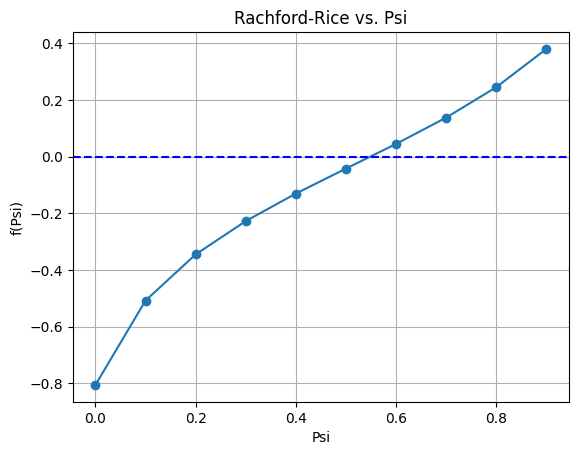

Psi: 0.0, f(Psi): -0.805199
Psi: 0.1, f(Psi): -0.5076868483131032
Psi: 0.2, f(Psi): -0.3449647785091292
Psi: 0.30000000000000004, f(Psi): -0.22739580303946222
Psi: 0.4, f(Psi): -0.13040172699087443
Psi: 0.5, f(Psi): -0.04228223774347706
Psi: 0.6000000000000001, f(Psi): 0.0446842501067547
Psi: 0.7000000000000001, f(Psi): 0.13749849207057774
Psi: 0.8, f(Psi): 0.2447277853313229
Psi: 0.9, f(Psi): 0.37974266515181726


In [10]:
z_i = [0.0079, 0.1321, 0.0849, 0.2690, 0.0589, 0.1321, 0.3151]
K_i = [16.2, 5.2, 2.6, 1.98, 0.91, 0.72, 0.28]

def rachford_rice(psi, K, z):
    return np.sum(z[i] * (1 - K[i]) / (1 + psi * (K[i] - 1)) for i in range(len(K)))

psis = np.arange(0, 1, 0.1)
f_i = [rachford_rice(psi, K_i, z_i) for psi in psis]

plt.plot(psis, f_i, marker='o')
plt.axhline(0, color='blue', linestyle='--')
plt.title('Rachford-Rice vs. Psi')
plt.xlabel('Psi')
plt.ylabel('f(Psi)')
plt.grid(True)
plt.show()

for Psi, f in zip(psis, f_i):
    print(f'Psi: {Psi}, f(Psi): {f}')


In [11]:
interp_linear = interp1d(f_i, psis, kind='linear')
f_interp = 0
print("Approximate root of the rachford-rice function via linear interpolation", interp_linear(f_interp))

Approximate root of the rachford-rice function via linear interpolation 0.5486190011677751


# Problem 4B

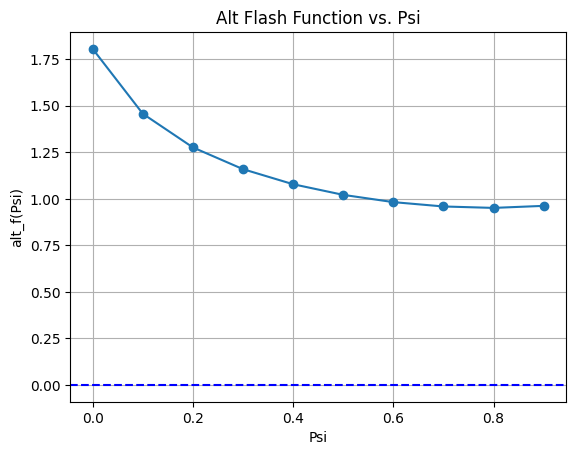

Psi: 0.0, alt_f(Psi): -0.805199
Psi: 0.1, alt_f(Psi): -0.5076868483131032
Psi: 0.2, alt_f(Psi): -0.3449647785091292
Psi: 0.30000000000000004, alt_f(Psi): -0.22739580303946222
Psi: 0.4, alt_f(Psi): -0.13040172699087443
Psi: 0.5, alt_f(Psi): -0.04228223774347706
Psi: 0.6000000000000001, alt_f(Psi): 0.0446842501067547
Psi: 0.7000000000000001, alt_f(Psi): 0.13749849207057774
Psi: 0.8, alt_f(Psi): 0.2447277853313229
Psi: 0.9, alt_f(Psi): 0.37974266515181726


In [12]:
def alt_flash(z, K, psi):
    return np.sum([ (z[i]*K[i]) / (1.0 + psi*(K[i] - 1)) for i in range(len(K)) ])

alt_f = [alt_flash(z_i, K_i, psi) for psi in psis]

plt.plot(psis, alt_f, marker='o')
plt.axhline(0, color='blue', linestyle='--')
plt.title('Alt Flash Function vs. Psi')
plt.xlabel('Psi')
plt.ylabel('alt_f(Psi)')
plt.grid(True)
plt.show()

for Psi, f in zip(psis, f_i):
    print(f'Psi: {Psi}, alt_f(Psi): {f}')


# Bonus (i): Bubble Point

In [13]:
x_w = 0.5
x_a = 0.5
P_total = 1.0

def Psat_water(T):
    return 10 ** (8.07131 - 1730.63 / (T + 233.426))

def Psat_acetic_acid(T):
    return 10 ** (8.02100 - 1936.01 / (T + 258.451))

def gamma_w(T):
    A = 0.1182 + 64.24 / T
    B = 0.1735 - 43.27 / T
    C = 0.1081
    log_gamma_w = x_a ** 2 * (A + B * (4 * x_w - 1) + C * (x_w - x_a) * (6 * x_w - 1))
    return 10 ** log_gamma_w

def gamma_a(T):
    A = 0.1182 + 64.24 / T
    B = 0.1735 - 43.27 / T
    C = 0.1081
    log_gamma_a = x_w ** 2 * (A + B * (4 * x_w - 3) + C * (x_w - x_a) * (6 * x_w - 5))
    return 10 ** log_gamma_a

def bubble_point_eq(T):
    Psat_W = Psat_water(T)
    Psat_A = Psat_acetic_acid(T)
    gamma_W = gamma_w(T)
    gamma_A = gamma_a(T)
    return x_w * gamma_W * Psat_W + x_a * gamma_A * Psat_A - P_total

T_guess = 80

print(fsolve(bubble_point_eq, T_guess)[0], "Celsius")

29.872027015910703 Celsius


/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_5716/2532522460.py:34: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  print(fsolve(bubble_point_eq, T_guess)[0], "Celsius")


# Bonus (i): Dew Point

In [14]:
def dew_point_eq(T):
    Psat_W = Psat_water(T)
    Psat_A = Psat_acetic_acid(T)
    gamma_W = gamma_w(T)
    gamma_A = gamma_a(T)
    return (x_w / gamma_W) * Psat_W + (x_a / gamma_A) * Psat_A - P_total


T_guess = 80
print(fsolve(dew_point_eq, T_guess)[0], "Celsius")


9.240523213235804 Celsius


# Bonus (ii)

In [15]:
T_flash = 19.56

Psat_W_flash = Psat_water(T_flash)
Psat_A_flash = Psat_acetic_acid(T_flash)
gamma_W_flash = gamma_w(T_flash)
gamma_A_flash = gamma_a(T_flash)

def flash_vapor_eqs(y):
    y_W, y_A = y
    eq1 = y_W * P_total - x_w * gamma_W_flash * Psat_W_flash
    eq2 = y_A * P_total - x_a * gamma_A_flash * Psat_A_flash
    return [eq1, eq2]

y_guess = [0.5, 0.5]
y_W_flash, y_A_flash = fsolve(flash_vapor_eqs, y_guess)
y_W_flash, y_A_flash = y_W_flash / (y_W_flash + y_A_flash), y_A_flash / (y_W_flash + y_A_flash)

y_W_flash, y_A_flash


(0.1247609614090915, 0.8752390385909085)

In [16]:
x_W_flash = x_w
x_A_flash = x_a

x_W_flash, x_A_flash


(0.5, 0.5)